# Homework 11: Linear Regression

## Logistics

**Due date**: The homework is due 17:00 (5:00pm) on Tuesday, April 2.

You will submit your work on [MarkUs](https://markus-ds.teach.cs.toronto.edu).
To submit your work:

1. Download this file (`Homework_11.ipynb`) from JupyterHub. (See [our JupyterHub Guide](../../../guides/jupyterhub_guide.ipynb) for detailed instructions.)
2. Submit this file to MarkUs under the **hw11** assignment. (See [our MarkUs Guide](../../../guides/markus_guide.ipynb) for detailed instructions.)

## Introduction

For this week's homework, we will look at the relationship between the length and width of fish with the weight of the fish, available in the `fish.csv` file. This dataset is a record of 7 common different fish species used in fish market sales. The 7 species include: Bream, Parkki, Perch, Pike, Roach, Smelt, and Whitefish.


## Question

_General Question: What can we say about the relationship between the length and width of a fish while trying to predict its weight?_


## Instructions and Learning Objectives

In this homework, you will:
* Create a data story in a notebook exploring the question.
* Visualize and analyze the relationships between length, width and weight.
* Create and compare different linear regression models.

## Setup

First import `numpy`, `pandas`, `matplotlib`, `seaborn`, and `statsmodels.formula.api` by running the cell below.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

## Data section

The this part of your notebook should read the raw data, extract a `DataFrame` containing the columns of interest.

Create the following pandas `DataFrame`s:

+ `fish_data`: the `DataFrame` created by reading in the `fish.csv` file.

In [2]:
# SOLUTION
fish_data = pd.read_csv("fish.csv")

fish_data.head()

,species,weight_g,length_vertical_cm,length_diagonal_cm,length_cross_cm,height_cm,width_cm
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Exploring the data

Create a histograms of the following:
+ vertical length of the fish (in cm)
+ width of the fish (in cm)
+ weight of the fish (in grams)

You do not need to store the results in a variable. Label the y-axis with "Frequency" and the x-axes with "Vertical Length (cm)", "Width (cm)" and "Weight (g)" where appropriate.  **(3 marks)**

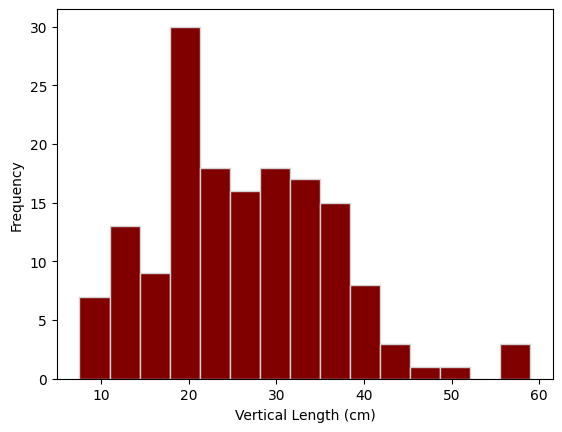

In [3]:
## SOLUTION
fish_data["length_vertical_cm"].plot.hist(color="maroon", edgecolor="lightgrey", bins=15)
plt.ylabel("Frequency")
plt.xlabel("Vertical Length (cm)");

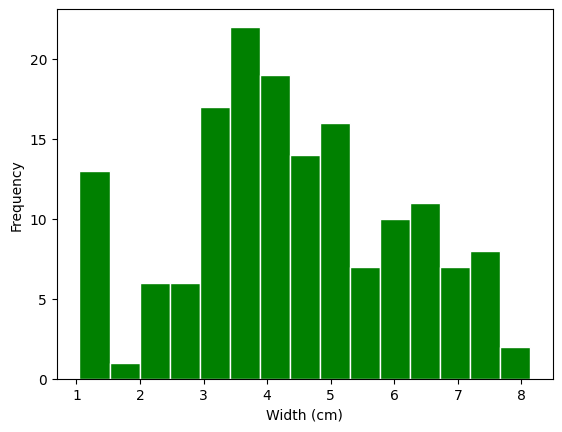

In [4]:
## SOLUTION

fish_data["width_cm"].plot.hist(color="green", edgecolor="white", bins=15)
plt.ylabel("Frequency")
plt.xlabel("Width (cm)");

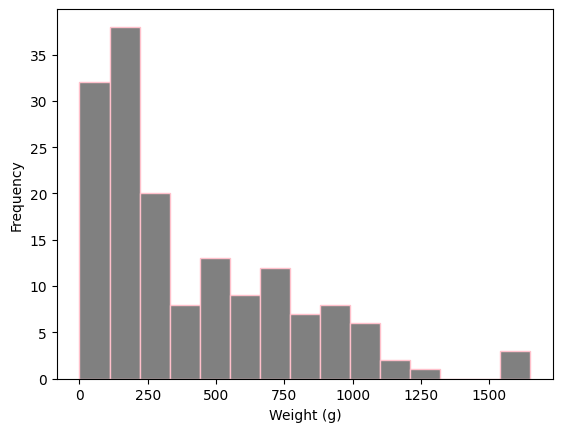

In [5]:
## SOLUTION

fish_data["weight_g"].plot.hist(color="grey", edgecolor="pink", bins=15)
plt.ylabel("Frequency")
plt.xlabel("Weight (g)");

Comment on the shape of each histogram and the distribution of the vertical length, width, and weight of the fish in terms of the skewness, the range, and the number of modes. **(3 marks)**

> **Sample solution**
> 
> The vertical length is slightly right-skewed, unimodal, and has a range of 10 to 60cm. 
> 
> The width is fairly symmetric, unimoda (may argue it's bi/multimodal), and has a range of 1 to 8cm. 
> 
> The weight is right-skewed ranging from 0 to 1500g.

Create two scatterplots:
+ one with `width_cm` on the x-axis and `weight_g` on the y-axis.
+ one with `length_vertical_cm` on the x-axis and `weight_g` on the y-axis.

Label the axes with "Vertical Length (cm)", "Width (cm)" and "Weigth (g)" where appropriate. You do not need to save the values in a variable. **(2 marks)**

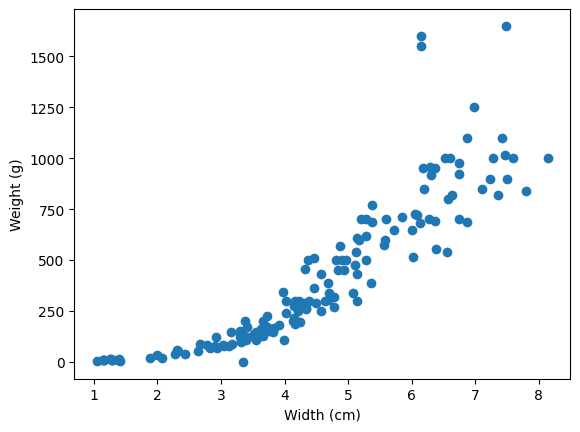

In [6]:
## Solution
plt.scatter(x=fish_data["width_cm"], y=fish_data["weight_g"])
plt.xlabel("Width (cm)")
plt.ylabel("Weight (g)");

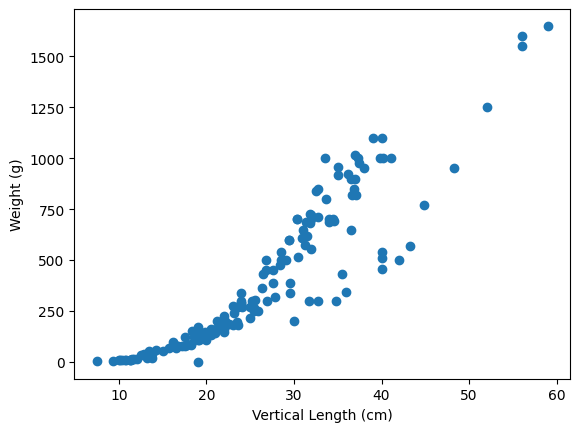

In [7]:
## Solution
plt.scatter(x=fish_data["length_vertical_cm"], y=fish_data["weight_g"])
plt.xlabel("Vertical Length (cm)")
plt.ylabel("Weight (g)");

Comment on the shape of each scatterplot. Specifically commenting on whether the trends looks "positive" or "negative" and whether the trends appear linear or not. **(2 marks)**

> **Solution**
> 
> Both plots appear to have a moderately positive trend, but the trend appears to have some curvature.

Create a new column in `fish_data` called `weight_g_sqrt` which takes the `weight_g` and square roots the values. _Hint: this can be done by using `.apply(np.sqrt)`_. **(1 mark)**

In [8]:
## Solution

fish_data["weight_g_sqrt"] = fish_data["weight_g"].apply(np.sqrt)

Now create two new scatterplots:
+ one with `width_cm` on the x-axis and `weight_g_sqrt` on the y-axis.
+ one with `length_vertical_cm` on the x-axis and `weight_g_sqrt` on the y-axis.

Label the axes with "Vertical Length (cm)", "Width (cm)" and "Weight Sqrt" where appropriate. **(1 mark)**

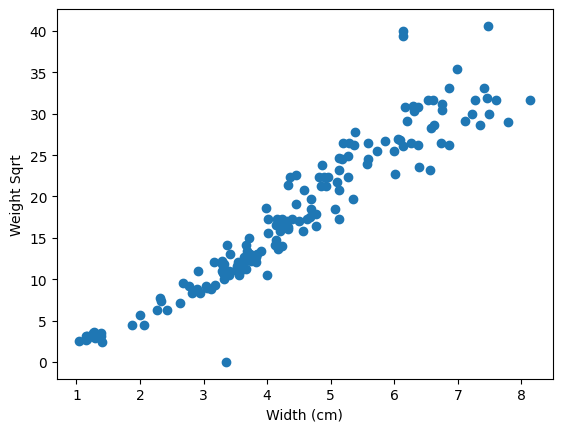

In [9]:
## Solution
plt.scatter(x=fish_data["width_cm"], y=fish_data["weight_g_sqrt"])
plt.xlabel("Width (cm)")
plt.ylabel("Weight Sqrt");

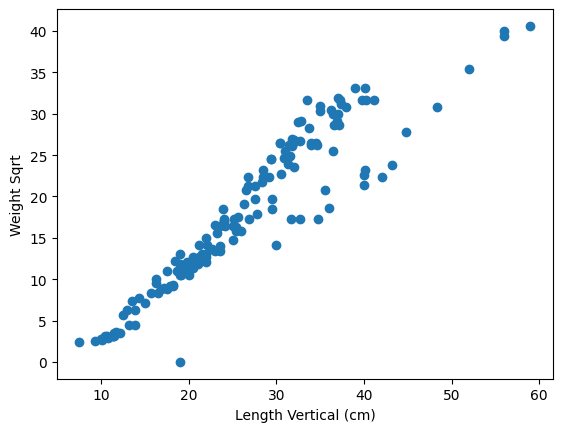

In [10]:
## Solution
plt.scatter(x=fish_data["length_vertical_cm"], y=fish_data["weight_g_sqrt"])
plt.xlabel("Length Vertical (cm)")
plt.ylabel("Weight Sqrt");

Comment on the linearity of the scatterplots with weight square rooted. **(1 mark)**

> **Solution**
> 
> The scatterplots appear to still have a positive, moderate trend, but now appear to be more linear. So a linear regression might be appropriate using the transformed variable.

## Methods

Setup a linear regression, called `regmod1`, estimate and fit the model (call this `regmod1_fit`) and calculate the parameter estimates (using `.params`), specifically with `weight_g_sqrt` as the dependent variable and `width_cm` as the independent variable. **(3 marks)**

In [11]:
## Solution

regmod1 = smf.ols('weight_g_sqrt ~ width_cm', data = fish_data) # setup the model

regmod1_fit = regmod1.fit() # estimate/fit the model 

regmod1_fit.params # get parameter estimates

Intercept   -5.192309
width_cm     5.185988
dtype: float64

What is the estimated line of best fit for `regmod1`? Provide an interpretation for the y-intercept and slope estimates. Comment on whether the y-intercept makes sense. **(2 marks)**

> **Sample Solution**
> 
> The estimated line is $$\texttt{Weight.Sqrt} = -5.192 + 5.186 \times \texttt{Width}$$
> 
> The y-intercept of -5.192, means that a fish that is 0cm wide is expected to have a square root weight of -5.192. This is nonsensical since the square root and fish weight cannot be below 0g, but we need the y-intercept to define the line mathematically.
> 
> The slope of 5.186, means that for every 1cm increase in a fish's width, we expect the fish's square rooted weight to increase by 5.186.

Setup another linear regression, called `regmod2`, estimate and fit the model (call this `regmod2_fit`) and calculate the parameter estimates (using `.params`), specifically with `weight_g_sqrt` as the dependent variable and both `width_cm` and `length_vertical_cm` as the independent variables. **(1 mark)**

In [12]:
## Solution

regmod2 = smf.ols('weight_g_sqrt ~ width_cm + length_vertical_cm', data = fish_data) # setup the model

regmod2_fit = regmod2.fit() # estimate/fit the model 

regmod2_fit.params # get parameter estimates

Intercept            -6.704586
width_cm              2.986523
length_vertical_cm    0.427794
dtype: float64

What is the estimated line of best fit for `regmod2`? Provide an interpretation for the y-intercept and slope estimates. **(2 marks)**

> **Sample Solution**
> 
> The estimated line is $$\texttt{Weight.Sqrt} = -6.705 + 2.987 \times \texttt{Width}+ 0.428 \times \texttt{Vertical.Length}$$
> 
> The y-intercept of -6.705, means that a fish that is 0cm wide and 0cm long (vertically) is expected to have a square root weight of -6.705. This is non-sensical since the square root and fish weight cannot be below 0g, but we need the y-intercept to define the line mathematically.
> 
> The slope of 2.987, means that for every 1cm increase in a fish's width (with no change in the fish's vertical length), we expect the fish's square rooted weight to increase by 2.987.
> 
> The slope of 0.428, means that for every 1cm increase in a fish's vertical length (with no change in the fish's width), we expect the fish's square rooted weight to increase by 0.428.

Print out the summary tables for both models (`regmod1` and `regmod2`) which display the p-values ande 95% confidence intervals associated with the intercept and slope estimates. **(1 mark)**

In [13]:
## Solution
regsum1 = regmod1_fit.summary()
print(regsum1.tables[1])

regsum2 = regmod2_fit.summary()
print(regsum2.tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.1923      0.654     -7.938      0.000      -6.484      -3.900
width_cm       5.1860      0.138     37.471      0.000       4.913       5.459
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -6.7046      0.464    -14.465      0.000      -7.620      -5.789
width_cm               2.9865      0.191     15.651      0.000       2.610       3.363
length_vertical_cm     0.4278      0.032     13.294      0.000       0.364       0.491


Calculate the $R^2$ for both models, and save them in `regmod1_rsquared` and `regmod2_rsquared`. **(1 mark)**

In [14]:
## Solution

regmod1_rsquared = regmod1_fit.rsquared
print(regmod1_rsquared)
regmod2_rsquared = regmod2_fit.rsquared
print(regmod2_rsquared)

0.8994288827287736
0.9528478097297595


## Conclusion

Based on the scatterplots, p-values, confidence intervals and $R^2$ which of the two models would you select to model a fish's weight (square rooted). You will be graded based on the appropriate justification(s) provided. __(2 marks)__


> **Sample Solution**
> 
> They really can select either model and it is correct. The justification is what is important here:
> 
> Option1: Choose regmod1 since it is the simpler model and already has fairly high $R^2$.
> 
> Option2: Choose regmod2 since it is including vertical length which is significant and increases $R^2$ by a fair amount.